Data Collection Part 1

In [42]:
import pandas as pd
raw_comments_df = pd.read_pickle('pre_comments_df.pkl')
raw_comments_df.dtypes

body                   object
created_utc    datetime64[ns]
dtype: object

In [43]:
raw_comments_df

,body,created_utc
4482265,Not even close to enough rockets,2021-01-01
2298808,"no product, no revenue",2021-01-01
4481342,Green apple Jack Daniels and coke,2021-01-01
4482266,I did this,2021-01-01
4481339,Not his own.,2021-01-01
...,...,...
6743925,He said in his opinion vaccines where effectiv...,2021-11-28
6743924,https://en.m.wikipedia.org/wiki/Straw_man,2021-11-28
6743923,The boyfriend of my wife and his stepmother ar...,2021-11-28
6743921,This sounds eerily similar to my relationship ...,2021-11-28


Month Counter -> Chart Display

In [44]:
monthcounter_df = raw_comments_df['created_utc'].groupby(raw_comments_df.created_utc.dt.to_period("M")).agg('count')
monthcounter_df

created_utc
2021-01    5854247
2021-02    4644290
2021-03    2361654
2021-04    1417778
2021-05    1339675
2021-06    2129259
2021-07    1083788
2021-08    1007205
2021-09    1001595
2021-10     919366
2021-11     956266
Freq: M, Name: created_utc, dtype: int64

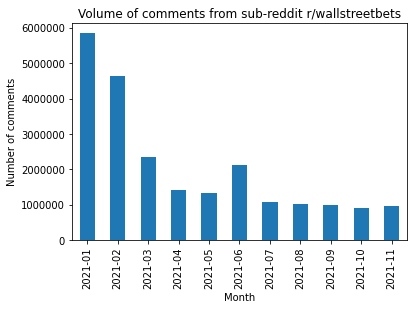

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Volume of comments from sub-reddit r/wallstreetbets')
plt.ticklabel_format(style='plain')
monthcounter_df.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of comments')
plt.show()

[removed] [deleted]

In [46]:
raw_comments_df2 = raw_comments_df
row_to_be_deleted_1 = raw_comments_df2[raw_comments_df2['body'] == '[removed]'].index
row_to_be_deleted_2 = raw_comments_df2[raw_comments_df2['body'] == '[deleted]'].index
raw_comments_df2.drop(row_to_be_deleted_1, inplace=True)
raw_comments_df2.drop(row_to_be_deleted_2, inplace=True)
raw_comments_df2

,body,created_utc
4482265,Not even close to enough rockets,2021-01-01
2298808,"no product, no revenue",2021-01-01
4481342,Green apple Jack Daniels and coke,2021-01-01
4482266,I did this,2021-01-01
4481339,Not his own.,2021-01-01
...,...,...
6743925,He said in his opinion vaccines where effectiv...,2021-11-28
6743924,https://en.m.wikipedia.org/wiki/Straw_man,2021-11-28
6743923,The boyfriend of my wife and his stepmother ar...,2021-11-28
6743921,This sounds eerily similar to my relationship ...,2021-11-28


In [47]:
monthcounter_df2 = raw_comments_df2['created_utc'].groupby(raw_comments_df2.created_utc.dt.to_period("M")).agg('count')
monthcounter_df2

created_utc
2021-01    4407690
2021-02    3170538
2021-03    1944148
2021-04    1219579
2021-05    1228267
2021-06    1633043
2021-07     892856
2021-08     838996
2021-09     822080
2021-10     758369
2021-11     800428
Freq: M, Name: created_utc, dtype: int64

General Preprocess, REGEX

In [48]:
raw_comments_df3 = raw_comments_df2
raw_comments_df3 = raw_comments_df3.replace(r'\n', ' ', regex=True)
raw_comments_df3 = raw_comments_df3.replace(r'http\S+', '', regex=True)
raw_comments_df3 = raw_comments_df3.replace({' +':' '},regex=True)
row_to_be_deleted_3 = raw_comments_df3[raw_comments_df3['body'] == ''].index
raw_comments_df3.drop(row_to_be_deleted_3, inplace=True)
raw_comments_df3

,body,created_utc
4482265,Not even close to enough rockets,2021-01-01
2298808,"no product, no revenue",2021-01-01
4481342,Green apple Jack Daniels and coke,2021-01-01
4482266,I did this,2021-01-01
4481339,Not his own.,2021-01-01
...,...,...
6743926,FAUCI is just mad that a bull fuked his wife.,2021-11-28
6743925,He said in his opinion vaccines where effectiv...,2021-11-28
6743923,The boyfriend of my wife and his stepmother ar...,2021-11-28
6743921,This sounds eerily similar to my relationship ...,2021-11-28


In [49]:
monthcounter_df3 = raw_comments_df3['created_utc'].groupby(raw_comments_df3.created_utc.dt.to_period("M")).agg('count')
monthcounter_df3

created_utc
2021-01    4395910
2021-02    3163680
2021-03    1940536
2021-04    1217629
2021-05    1226330
2021-06    1630385
2021-07     891664
2021-08     837718
2021-09     820812
2021-10     757317
2021-11     799202
Freq: M, Name: created_utc, dtype: int64

COMBINE DATAFRAME

In [50]:
df1 = pd.DataFrame(monthcounter_df)
df1

,created_utc
created_utc,
2021-01,5854247
2021-02,4644290
2021-03,2361654
2021-04,1417778
2021-05,1339675
2021-06,2129259
2021-07,1083788
2021-08,1007205
2021-09,1001595


In [51]:
df2 = pd.DataFrame(monthcounter_df2)
df2

,created_utc
created_utc,
2021-01,4407690
2021-02,3170538
2021-03,1944148
2021-04,1219579
2021-05,1228267
2021-06,1633043
2021-07,892856
2021-08,838996
2021-09,822080


In [52]:
df3 = pd.DataFrame(monthcounter_df3)
df3

,created_utc
created_utc,
2021-01,4395910
2021-02,3163680
2021-03,1940536
2021-04,1217629
2021-05,1226330
2021-06,1630385
2021-07,891664
2021-08,837718
2021-09,820812


In [53]:
df1 = df1.rename(columns={"created_utc":"Raw"})
df2 = df2.rename(columns={"created_utc":"Empty"})
df3 = df3.rename(columns={"created_utc":"Regex"})

In [54]:
df1

,Raw
created_utc,
2021-01,5854247
2021-02,4644290
2021-03,2361654
2021-04,1417778
2021-05,1339675
2021-06,2129259
2021-07,1083788
2021-08,1007205
2021-09,1001595


In [55]:
df2

,Empty
created_utc,
2021-01,4407690
2021-02,3170538
2021-03,1944148
2021-04,1219579
2021-05,1228267
2021-06,1633043
2021-07,892856
2021-08,838996
2021-09,822080


In [56]:
df3

,Regex
created_utc,
2021-01,4395910
2021-02,3163680
2021-03,1940536
2021-04,1217629
2021-05,1226330
2021-06,1630385
2021-07,891664
2021-08,837718
2021-09,820812


In [60]:
test_frames = [df1, df2, df3]
test_result = pd.concat(test_frames, axis=1)
test_result

,Raw,Empty,Regex
created_utc,,,
2021-01,5854247,4407690,4395910
2021-02,4644290,3170538,3163680
2021-03,2361654,1944148,1940536
2021-04,1417778,1219579,1217629
2021-05,1339675,1228267,1226330
2021-06,2129259,1633043,1630385
2021-07,1083788,892856,891664
2021-08,1007205,838996,837718
2021-09,1001595,822080,820812


In [62]:
test_result.to_pickle('combine_plot_process.pkl')

<AxesSubplot:xlabel='created_utc'>

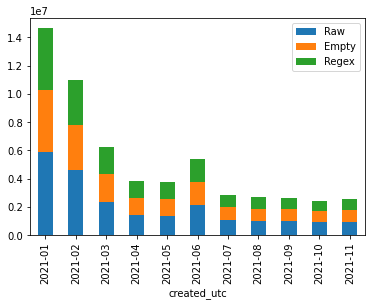

In [61]:
res = test_result.plot.bar(stacked=True)
res